# Import des modules requis

In [8]:
%matplotlib inline
!pip install tensorflow==2.11.0


In [63]:
import numpy as np                   
import matplotlib.pyplot as plt     
import random  
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score

# MNIST dataset

In [10]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
mnist = tf.keras.datasets.mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", Y_test.shape)

11490434/11490434 [==============================] - 7s 1us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


# Data Visualization

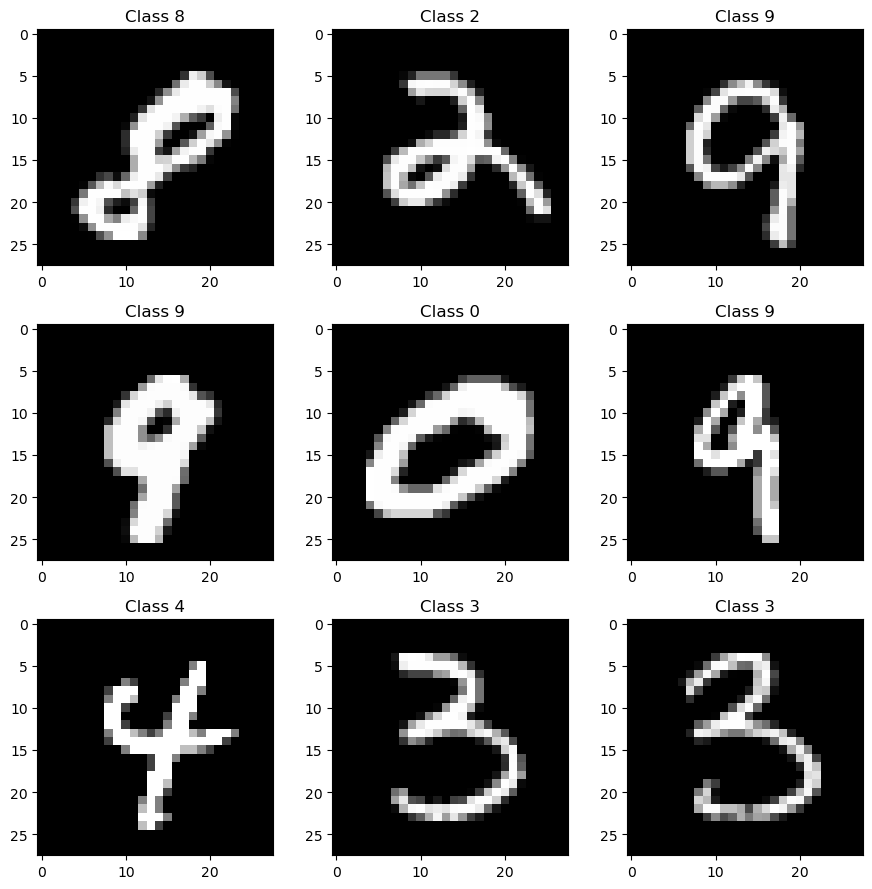

In [11]:
plt.rcParams['figure.figsize'] = (9,9) 

random.seed(3)
nums = [random.randint(0, len(X_train)) for x in range(9)]

for i, num in enumerate(nums):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(Y_train[num]))
    
plt.tight_layout()

# Reformater l'input

In [35]:
print("X_train shape", X_train.shape)
print("Y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("Y_test shape", Y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 784)
Y_train shape (60000,)
X_test shape (10000, 784)
Y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [40]:
# one-hot encoding 
n_classes = 10
print("Shape before one-hot encoding: ", Y_train.shape)
Y_train = np_utils.to_categorical(Y_train, n_classes)
Y_test = np_utils.to_categorical(Y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


# Construisons un premier réseau

## Import Keras Layers

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import Conv2D, Flatten, MaxPooling2D


## Setting network parameters

In [41]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

## Compiling and training the model:

In [42]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Epoch 1/20
469/469 - 9s - loss: 0.0451 - accuracy: 0.9860 - val_loss: 0.0673 - val_accuracy: 0.9788 - 9s/epoch - 20ms/step
Epoch 2/20
469/469 - 9s - loss: 0.0428 - accuracy: 0.9858 - val_loss: 0.0668 - val_accuracy: 0.9792 - 9s/epoch - 19ms/step
Epoch 3/20
469/469 - 9s - loss: 0.0404 - accuracy: 0.9871 - val_loss: 0.0650 - val_accuracy: 0.9796 - 9s/epoch - 20ms/step
Epoch 4/20
469/469 - 9s - loss: 0.0381 - accuracy: 0.9882 - val_loss: 0.0646 - val_accuracy: 0.9800 - 9s/epoch - 19ms/step
Epoch 5/20
469/469 - 9s - loss: 0.0348 - accuracy: 0.9887 - val_loss: 0.0622 - val_accuracy: 0.9803 - 9s/epoch - 20ms/step
Epoch 6/20
469/469 - 9s - loss: 0.0344 - accuracy: 0.9895 - val_loss: 0.0660 - val_accuracy: 0.9800 - 9s/epoch - 19ms/step
Epoch 7/20
469/469 - 9s - loss: 0.0331 - accuracy: 0.9896 - val_loss: 0.0642 - val_accuracy: 0.9809 - 9s/epoch - 19ms/step
Epoch 8/20
469/469 - 9s - loss: 0.0297 - accuracy: 0.9904 - val_loss: 0.0656 - val_accuracy: 0.9803 - 9s/epoch - 20ms/step
Epoch 9/20
469/4

KeyError: 'acc'

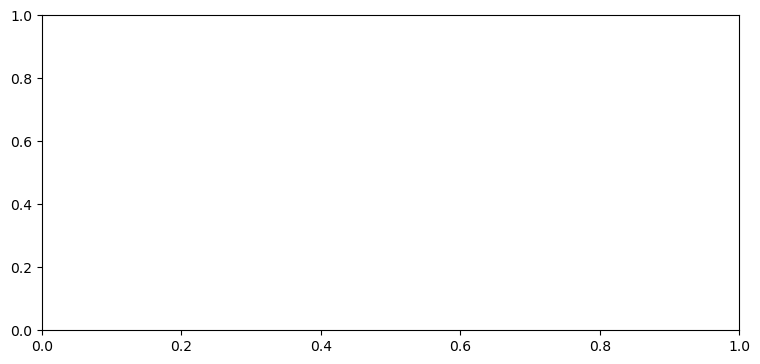

In [44]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))




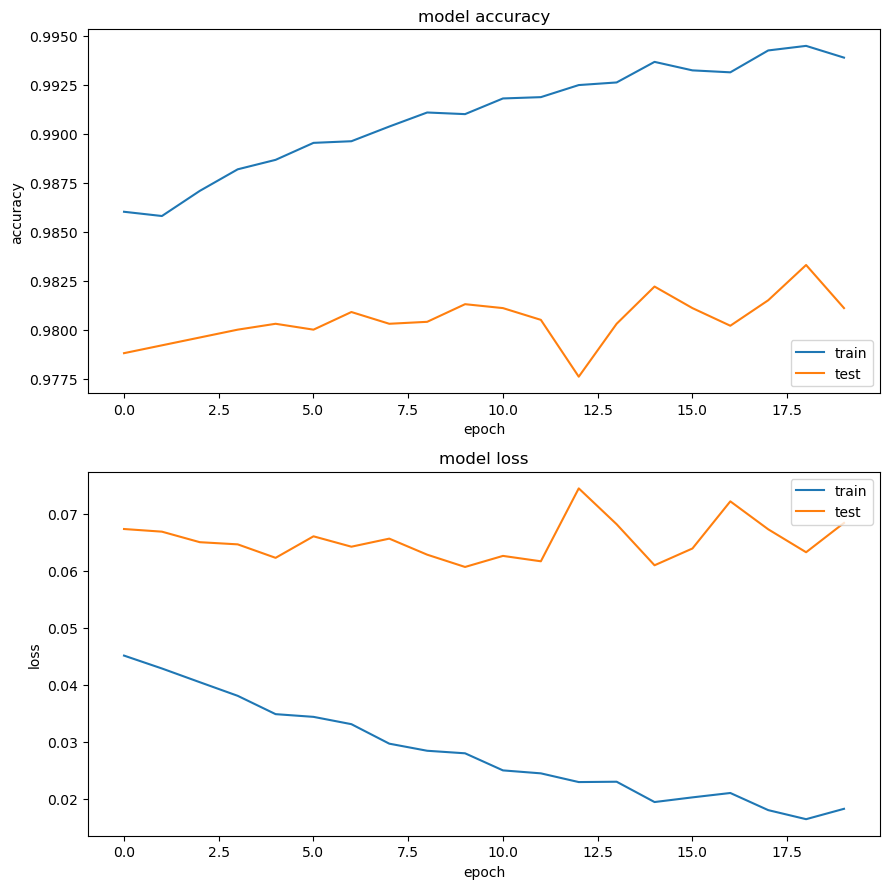

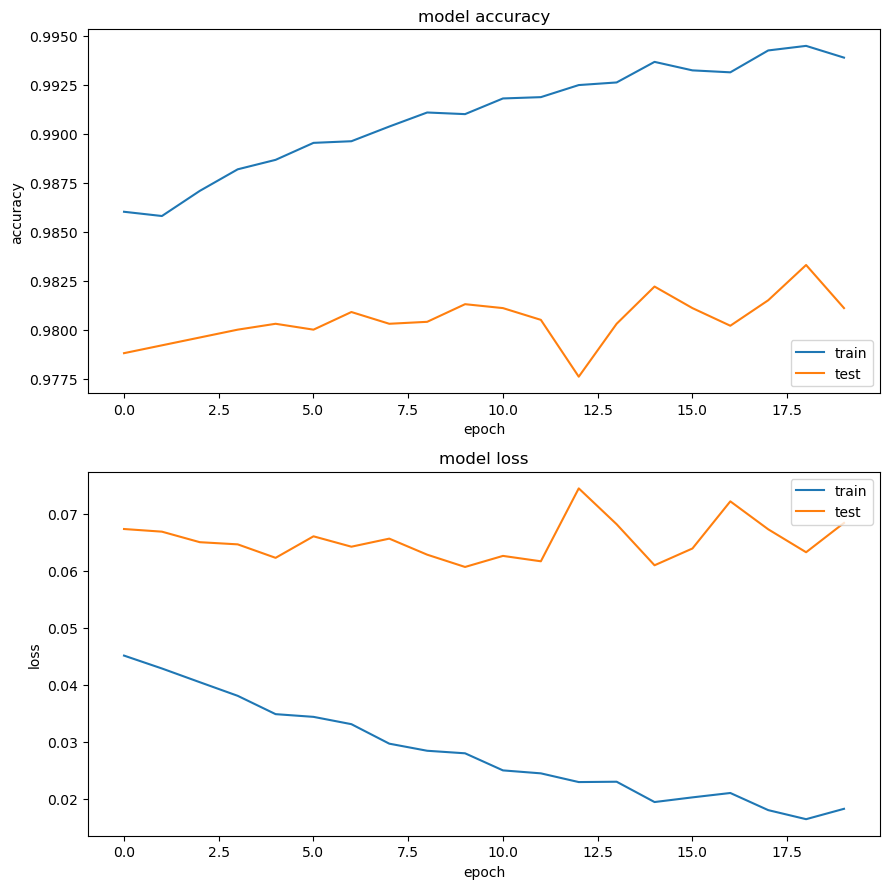

In [45]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

## Evaluate the model

In [46]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0684 - accuracy: 0.9811
Test score: 0.06836450099945068
Test accuracy: 0.9811000227928162


# Convolution

In [48]:
tf.keras.layers.Conv2D(32,                      # on crée 32 filtres
                       (3, 3),                  # kernel de taille (3,3)
                       input_shape=(28,28,1))



In [49]:
tf.keras.layers.MaxPooling2D(pool_size=(2,2))


In [50]:
# Recharger le dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [51]:
X_train = X_train.reshape(60000, 28, 28, 1) # Ajouter une dimension supplémentaire pour représenter la couche unique
X_test = X_test.reshape(10000, 28, 28, 1)

X_train, X_test = X_train / 255.0, X_test / 255.0

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [56]:
                               
model = tf.keras.models.Sequential()                                 

model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

In [58]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer=optimizer, 
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]
)
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_16 (Dense)            (None, 100)               540900    
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

# Train and test the model

In [60]:
model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2319 - accuracy: 0.9291
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0733 - accuracy: 0.9780
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0462 - accuracy: 0.9860
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0342 - accuracy: 0.9896
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0248 - accuracy: 0.9924
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0180 - accuracy: 0.9948
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0136 - accuracy: 0.9960
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0102 - accuracy: 0.9971
Epoch 9/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0079 - accuracy: 0.9978
Epoch 10/10
1875/1875 [==============================] - 32s 17m

In [65]:
predictions = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(Y_test, predictions)

313/313 [==============================] - 2s 7ms/step


0.9883